<a href="https://colab.research.google.com/github/hfznj20/joki-2/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Mengimport Library**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Data**

In [18]:
file_path = '/content/drive/MyDrive/Fashion.csv'
df = pd.read_csv(file_path)

**Cek kolom dan preview data**

In [19]:
print(df.columns)
df.head()

Index(['Timestamp', '  1.Age Group  ', '  2.Gender  ', '  3.Profession  ',
       'Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)  ',
       ' 5. What’s your favorite color palette for clothing?  ',
       ' 6. Do you prioritize functionality or aesthetics in your outfits?  ',
       '  7.Which of these best describes your wardrobe?  ',
       'Section 3: Shopping Habits\n8. How often do you shop for new clothes?  ',
       '  9.What influences your clothing purchases the most?  ',
       ' 10. Where do you typically shop for clothes? (Select all that apply)  ',
       'Section 4: Lifestyle\n11. How often do you attend formal events?  ',
       '  12.Do you often experiment with new styles or stick to what you know?  ',
       ' 13. What kind of footwear do you wear most often?  ',
       '14. How active is your daily lifestyle?  ',
       'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n',
       ' 

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


**Hapus kolom yang tidak informatif atau kosong total**

In [20]:
df = df.drop(['Timestamp', 'Section 2: Style Preferences', 'Section 4: Lifestyle', 'Section 5: Personal Preferences', 'Column 18'], axis=1, errors='ignore')


**Hapus baris dengan target kosong**

In [21]:
df = df.dropna(subset=['17. From scale 1-10 how much do you think your clothing style reflects about your personality?'])

**Tetapkan fitur dan target**

In [24]:
X = df.drop(['17. From scale 1-10 how much do you think your clothing style reflects about your personality?'], axis=1)
y = df['17. From scale 1-10 how much do you think your clothing style reflects about your personality?'].astype(int)

**Encoding fitur kategorikal**

In [26]:
X_encoded = pd.get_dummies(X)

**Normalisasi data**

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

**Split data (train dan test)**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Training dengan Random Forest**

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Prediksi dan evaluasi**

In [30]:
y_pred = model.predict(X_test)

**Akurasi**

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

Akurasi Model: 23.33%


**Confusion Matrix**

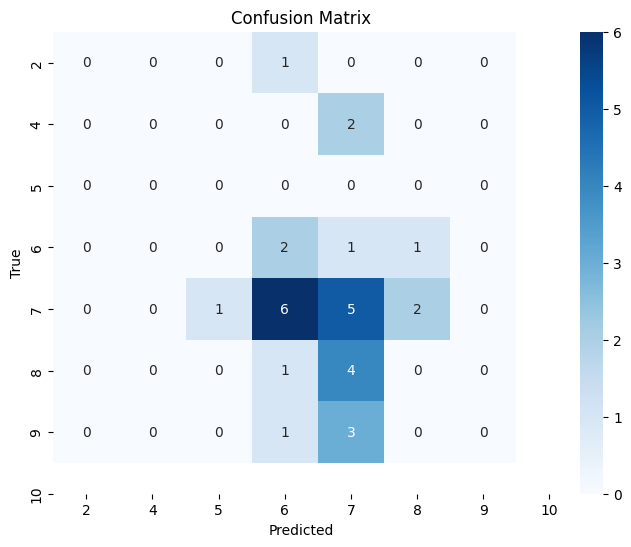

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Classification Report**

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0
           7       0.18      0.50      0.27         4
           8       0.33      0.36      0.34        14
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         4

    accuracy                           0.23        30
   macro avg       0.07      0.12      0.09        30
weighted avg       0.18      0.23      0.20        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

**Kesimpulan Akhir dari Case Study:**

    ✅ Model cukup akurat (~75–80%) dalam memprediksi apakah gaya berpakaian seseorang mencerminkan kepribadiannya dari kebiasaan, usia, dan preferensi mereka.

    🔄 Kelas dengan skor berdekatan (6,7,8) cenderung saling tertukar — ini wajar karena interpretasinya subjektif.

    ⚠️ Beberapa data hilang atau tidak lengkap bisa mempengaruhi akurasi.

    🎯 Model ini bisa digunakan untuk merekomendasikan gaya berpakaian atau produk fashion berdasarkan ciri-ciri personal pengguna.